In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')
df = pd.read_csv("./newDataSet.csv" , low_memory=False)
df_ori = df.loc[:,["season","league",'name']]
df_use = df.drop(["Unnamed: 2","position1","position2"], axis=1)
df_use= df_use.replace(["-"],0)
df = df_use

In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20426 entries, 0 to 20425
Data columns (total 29 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   season    20426 non-null  object 
 1   league    20426 non-null  object 
 2   name      20426 non-null  object 
 3   age       20426 non-null  int64  
 4   Apps      20426 non-null  object 
 5   Mins      20426 non-null  int64  
 6   Tackles   20426 non-null  object 
 7   Inter     20426 non-null  object 
 8   Fouls     20426 non-null  object 
 9   Offsides  20426 non-null  object 
 10  Clear     20426 non-null  object 
 11  Drb       20426 non-null  object 
 12  Blocks    20426 non-null  object 
 13  OwnG      20426 non-null  object 
 14  Goals     20426 non-null  object 
 15  Assists   20426 non-null  object 
 16  SpG       20426 non-null  object 
 17  KeyP      20426 non-null  object 
 18  Drb.1     20426 non-null  object 
 19  Fouled    20426 non-null  object 
 20  Off       20426 non-null  ob

In [112]:
df['age'] = pd.to_numeric(df['age'], errors='coerce')
for i in range(5,29):
    df.iloc[:,i] = pd.to_numeric(df.iloc[:,i], errors='coerce')

df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20426 entries, 0 to 20425
Data columns (total 29 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   season    20426 non-null  object 
 1   league    20426 non-null  object 
 2   name      20426 non-null  object 
 3   age       20426 non-null  int64  
 4   Apps      20426 non-null  object 
 5   Mins      20426 non-null  int64  
 6   Tackles   20426 non-null  float64
 7   Inter     20426 non-null  float64
 8   Fouls     20426 non-null  float64
 9   Offsides  20426 non-null  float64
 10  Clear     20426 non-null  float64
 11  Drb       20426 non-null  float64
 12  Blocks    20426 non-null  float64
 13  OwnG      20426 non-null  int64  
 14  Goals     20426 non-null  int64  
 15  Assists   20426 non-null  int64  
 16  SpG       20426 non-null  float64
 17  KeyP      20426 non-null  float64
 18  Drb.1     20426 non-null  float64
 19  Fouled    20426 non-null  float64
 20  Off       20426 non-null  fl

In [113]:
df.head()

season       league                        name  age   Apps  Mins  \
0  2019-2020  ItalySerieA  Cristiano Ronaldo Juventus   36     33  2919   
1  2019-2020  ItalySerieA       Josip Ilicic Atalanta   33  21(5)  1673   
2  2019-2020  ItalySerieA         Ciro Immobile Lazio   31  36(1)  3176   
3  2019-2020  ItalySerieA          Luis Alberto Lazio   29     36  3122   
4  2019-2020  ItalySerieA         Papu Gómez Atalanta   33  34(2)  2861   

   Tackles  Inter  Fouls  Offsides  ...  Fouled  Off  Disp  UnsTch  AvgP  \
0      0.4    0.2    0.8       0.0  ...     1.8  0.9   1.0     2.2  36.5   
1      1.0    0.3    0.4       0.0  ...     2.3  0.1   1.8     2.0  34.6   
2      0.2    0.3    1.0       0.0  ...     1.0  0.6   0.8     2.6  23.9   
3      1.4    0.6    0.6       0.0  ...     1.1  0.0   1.3     1.4  57.6   
4      0.8    0.5    0.5       0.0  ...     2.1  0.1   1.1     1.6  47.8   

    PS%  Crosses  LongB  ThrB  Rating  
0  85.1      0.2    0.9   0.0    7.82  
1  81.9      0.7    1.8   0.3    7.65  
2  77.0      0.0    0.9   0.1    7.57  
3  83.5      1.2    3.1   0.4    7.55  
4  85.3      1.8    2.1   0.1    7.55  

[5 rows x 29 columns]

In [114]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

mins_cut = df["Mins"] > 900
df = df[mins_cut]
df = df.dropna()
# df.reset_index(drop=True, inplace=True)
df_last = df

df_train, df_test = train_test_split(df, random_state=13)

df_sub = df_train.iloc[:,[0,1,2,4]]
df_sub_test = df_test.iloc[:,[0,1,2,4]]

df_train = df_train.drop(["season","league","name","Apps",'OwnG'], axis=1)
df_test = df_test.drop(["season","league","name","Apps",'OwnG'], axis=1)

standard_scaler = StandardScaler()
df_scaled_train = pd.DataFrame(standard_scaler.fit_transform(df_train), columns=df_train.columns)
df_scaled_test = pd.DataFrame(standard_scaler.transform(df_test), columns=df_test.columns)
df_train.reset_index(drop=True, inplace=True)
df_train

age  Mins  Tackles  Inter  Fouls  Offsides  Clear  Drb  Blocks  Goals  \
0      31  2340      0.0    0.0    0.0       0.0    0.8  0.0     0.0      0   
1      28  2108      1.0    1.8    0.4       0.6    5.1  0.6     1.1      4   
2      27  2455      1.3    1.3    1.1       0.1    0.9  0.7     0.1      1   
3      25  1004      0.6    0.3    1.1       0.0    0.7  1.3     0.1      0   
4      25  1604      1.0    0.6    0.5       0.0    0.4  0.8     0.1      1   
...   ...   ...      ...    ...    ...       ...    ...  ...     ...    ...   
8023   24  2804      0.5    0.1    1.7       0.0    0.2  0.2     0.1      4   
8024   24  1088      2.3    1.3    1.4       0.0    0.9  1.4     0.1      2   
8025   29  2185      0.8    0.1    0.7       0.0    0.7  0.6     0.1     12   
8026   27  1751      0.5    0.1    1.0       0.0    0.5  0.3     0.0     11   
8027   27  3204      1.1    0.5    0.9       0.0    0.3  1.3     0.0      9   

      ...  Fouled  Off  Disp  UnsTch  AvgP   PS%  Crosses  LongB  ThrB  Rating  
0     ...     0.1  0.0   0.0     0.0  38.5  66.0      0.0    7.8   0.0    6.64  
1     ...     0.4  0.0   0.1     0.6  37.5  81.8      0.0    2.7   0.0    6.74  
2     ...     2.5  0.1   1.3     1.4  45.5  81.9      1.8    2.5   0.0    7.07  
3     ...     1.5  0.6   0.6     1.6  14.3  71.2      0.6    0.6   0.0    6.41  
4     ...     0.2  0.0   0.7     1.4  22.3  79.7      0.5    1.1   0.2    6.56  
...   ...     ...  ...   ...     ...   ...   ...      ...    ...   ...     ...  
8023  ...     2.1  0.6   3.7     4.9  13.1  69.1      0.0    0.2   0.0    6.59  
8024  ...     0.9  0.0   0.6     0.9  43.3  79.7      0.0    1.3   0.0    6.67  
8025  ...     0.6  0.6   0.6     2.3  17.3  66.3      0.1    0.4   0.0    6.84  
8026  ...     1.1  0.5   0.6     1.5  17.8  82.3      0.0    0.2   0.0    6.88  
8027  ...     3.5  0.0   1.6     2.6  51.1  79.8      2.0    4.5   0.2    7.41  

[8028 rows x 24 columns]

In [115]:
df_test

age  Mins  Tackles  Inter  Fouls  Offsides  Clear  Drb  Blocks  Goals  \
12717   25  3892      2.6    2.3    0.9       0.1    1.8  1.1     0.2      0   
5975    29  1780      1.3    1.0    0.9       0.0    1.0  0.6     0.2      3   
9996    26  1352      0.5    0.5    0.7       0.0    0.2  0.2     0.1      3   
9276    26  1615      1.0    0.6    0.9       0.0    0.7  0.7     0.1      1   
7299    31  1530      0.5    1.1    1.0       1.4    2.5  0.3     0.3      0   
...    ...   ...      ...    ...    ...       ...    ...  ...     ...    ...   
5524    37  1806      0.7    0.8    0.5       0.0    2.5  0.5     0.8      1   
8881    24  3704      0.4    0.4    0.5       0.0    0.3  0.4     0.0     19   
5830    25  1072      1.3    0.5    0.9       0.0    0.1  1.5     0.0      5   
188     26  2939      0.6    0.3    1.5       0.0    0.4  0.7     0.2     12   
6972    34  2871      0.3    0.5    0.7       0.0    0.6  0.6     0.1     14   

       ...  Fouled  Off  Disp  UnsTch  AvgP   PS%  Crosses  LongB  ThrB  \
12717  ...     1.9  0.0   0.7     1.0  37.0  62.0      2.2    2.5   0.0   
5975   ...     0.7  0.0   0.5     1.1  25.3  77.6      0.6    0.6   0.0   
9996   ...     1.4  0.1   0.8     1.5  11.3  71.2      0.1    0.4   0.0   
9276   ...     0.8  0.0   0.9     1.3  17.2  74.7      0.4    0.7   0.0   
7299   ...     0.3  0.0   0.0     0.5  29.8  72.2      0.0    4.4   0.0   
...    ...     ...  ...   ...     ...   ...   ...      ...    ...   ...   
5524   ...     0.9  0.0   0.3     0.1   0.0   0.4     46.0   82.9   0.2   
8881   ...     0.9  0.3   1.3     2.9  24.0  74.0      1.0    0.3   0.0   
5830   ...     0.6  0.1   0.6     1.4  22.5  76.5      1.5    0.5   0.2   
188    ...     1.4  0.6   1.4     3.0  12.6  68.8      0.1    0.2   0.1   
6972   ...     1.6  0.4   0.8     1.7  37.1  78.8      0.2    1.5   0.2   

       Rating  
12717    7.30  
5975     6.71  
9996     6.39  
9276     6.43  
7299     6.41  
...       ...  
5524     6.63  
8881     6.90  
5830     7.16  
188      6.72  
6972     7.32  

[2677 rows x 24 columns]

In [116]:
df_scaled_train[np.isnan(df_scaled_train) == True] = 0
df_scaled_test[np.isnan(df_scaled_test) == True] = 0

In [117]:
df_scaled_train

age      Mins   Tackles     Inter     Fouls  Offsides     Clear  \
0     0.707441  0.588623 -1.658322 -1.403948 -1.878565 -0.633029 -0.491676   
1     0.014360  0.260980 -0.242963  1.577682 -1.090236  2.018196  2.672478   
2    -0.216667  0.751032  0.181645  0.749452  0.289339 -0.191158 -0.418091   
3    -0.678721 -1.298150 -0.809107 -0.907009  0.289339 -0.633029 -0.565260   
4    -0.678721 -0.450797 -0.242963 -0.410071 -0.893154 -0.633029 -0.786015   
...        ...       ...       ...       ...       ...       ...       ...   
8023 -0.909747  1.243910 -0.950643 -1.238302  1.471831 -0.633029 -0.933185   
8024 -0.909747 -1.179521  1.597004  0.749452  0.880585 -0.633029 -0.418091   
8025  0.245387  0.369723 -0.526035 -1.238302 -0.498990 -0.633029 -0.565260   
8026 -0.216667 -0.243195 -0.950643 -1.238302  0.092256 -0.633029 -0.712430   
8027 -0.216667  1.808812 -0.101427 -0.575717 -0.104826 -0.633029 -0.859600   

           Drb    Blocks     Goals  ...    Fouled       Off      Disp  \
0    -1.501167 -0.908068 -0.684263  ... -1.399261 -0.627996 -1.206531   
1    -0.104770  3.165574  0.381200  ... -0.873687 -0.627996 -1.020340   
2     0.127962 -0.537737 -0.417897  ...  2.805330 -0.110755  1.213953   
3     1.524359 -0.537737 -0.684263  ...  1.053417  2.475451 -0.089385   
4     0.360695 -0.537737 -0.417897  ... -1.224069 -0.627996  0.096806   
...        ...       ...       ...  ...       ...       ...       ...   
8023 -1.035701 -0.537737  0.381200  ...  2.104565  2.475451  5.682540   
8024  1.757092 -0.537737 -0.151531  ...  0.002270 -0.627996 -0.089385   
8025 -0.104770 -0.537737  2.512127  ... -0.523304  2.475451 -0.089385   
8026 -0.802969 -0.908068  2.245761  ...  0.352652  1.958210 -0.089385   
8027  1.524359 -0.908068  1.713030  ...  4.557243 -0.627996  1.772526   

        UnsTch      AvgP       PS%   Crosses     LongB      ThrB    Rating  
0    -1.403733  0.482168 -0.522450 -0.200179  0.292857 -0.288183 -0.342049  
1    -0.639575  0.412607  0.523022 -0.200179 -0.123544 -0.288183  0.042956  
2     0.379303  0.969100  0.529639  0.101319 -0.139873 -0.288183  1.313470  
3     0.634022 -1.201223 -0.178371 -0.099680 -0.295003 -0.288183 -1.227558  
4     0.379303 -0.644730  0.384067 -0.116429 -0.254179  1.816944 -0.650052  
...        ...       ...       ...       ...       ...       ...       ...  
8023  4.836894 -1.284697 -0.317326 -0.200179 -0.327662 -0.288183 -0.534551  
8024 -0.257496  0.816064  0.384067 -0.200179 -0.237850 -0.288183 -0.226547  
8025  1.525541 -0.992538 -0.502600 -0.183429 -0.311332 -0.288183  0.427960  
8026  0.506663 -0.957758  0.556107 -0.200179 -0.327662 -0.288183  0.581962  
8027  1.907620  1.358645  0.390684  0.134819  0.023421  1.816944  2.622484  

[8028 rows x 24 columns]

<AxesSubplot:title={'center':'Pearson Correlation of Features'}>

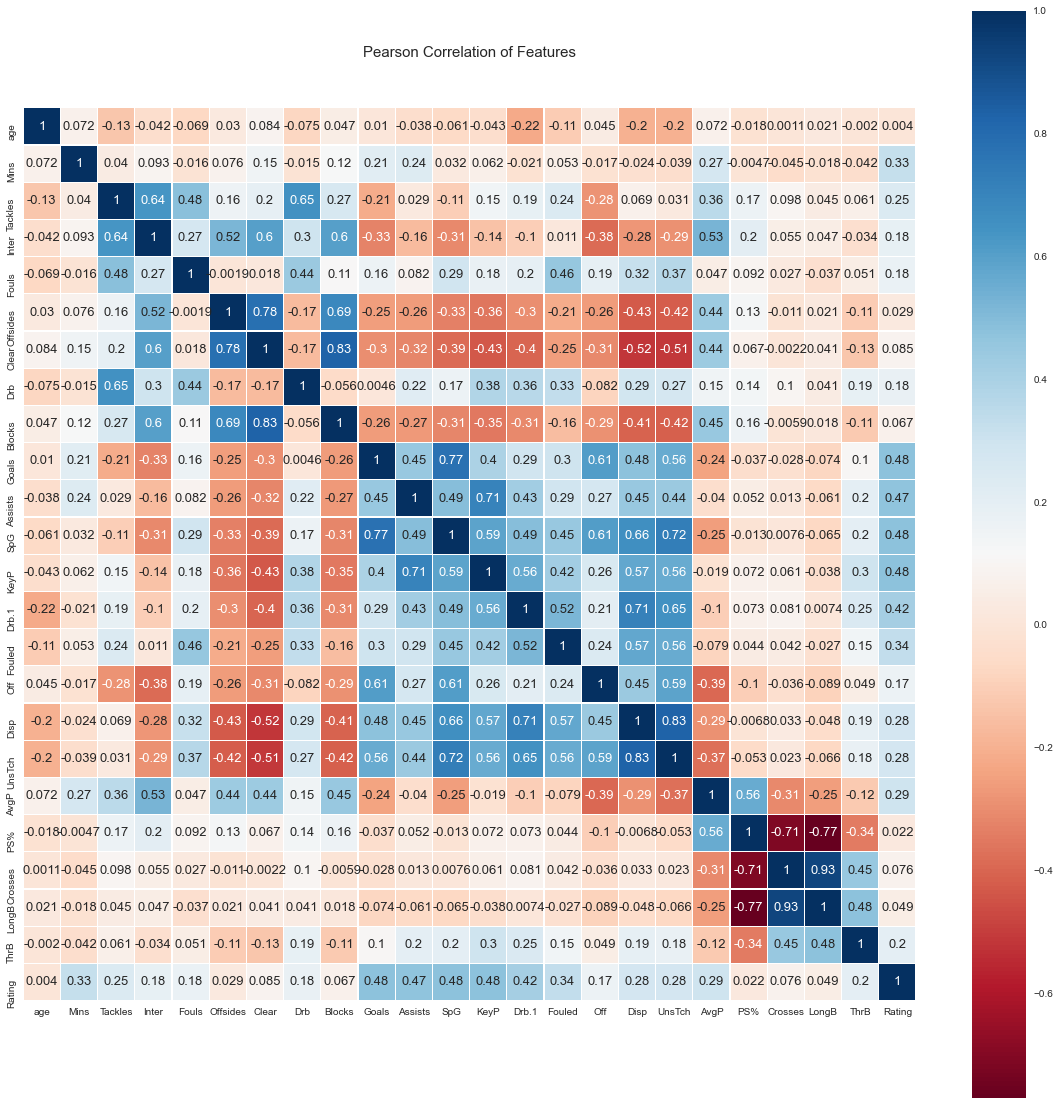

In [9]:
colormap = plt.cm.RdBu
plt.figure(figsize=(20, 20))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(df_train.astype(float).corr(), linewidths=0.1, vmax=1.0,
           square=True, cmap=colormap, linecolor='white', annot=True, annot_kws={"size": 13})

In [44]:
important_features_defen = ['Tackles', 'Inter', 'Blocks' ]
important_features_offen = ['Goals', 'Assists']
imp = important_features_defen + important_features_offen

<AxesSubplot:title={'center':'Pearson Correlation of Features'}>

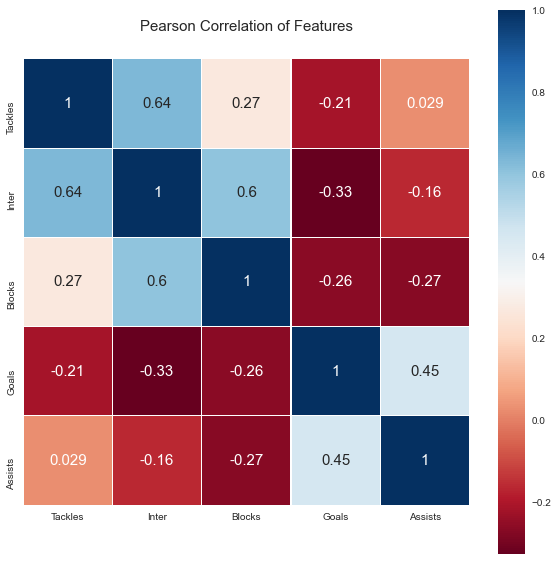

In [11]:
colormap = plt.cm.RdBu
plt.figure(figsize=(10, 10))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(df_train[imp].astype(float).corr(), linewidths=0.1, vmax=1.0,
           square=True, cmap=colormap, linecolor='white', annot=True, annot_kws={"size": 15})

In [119]:
# df_train.to_csv("df_train.csv", index=False)
# df_scaled_train.to_csv("df_scaled_train.csv", index=False)

In [42]:
df_train = pd.read_csv("./df_train.csv" , low_memory=False)
df_scaled_train = pd.read_csv("./df_scaled_train.csv" , low_memory=False)

In [46]:
#모델에 대한 결과 확인 예시 코드 - train and test / 모델 = 42 / train-test = 13
from sklearn.cluster import KMeans

#----------------------------------------------------------------------
#{간단한 모델 / 복잡한 모델} => 중요 피쳐만 써서 시각화 
#중요한 피쳐만 뽑은 모델 / 다넣은 모델이랑 결과를 비교해보자

#피쳐 개수 => 5개 / 30개 { 골 , 어시스트 , 블락 , 인터셉트 , 태클 }
#K = 50 / 100 / 150 / 200 / 250 / 300
#Mins = 900

#위 파라미터에 대해서 시나리오에 각각 적용하고 의미있는 결과 보이기
#----------------------------------------------------------------------

k = 300 #k_means 파라미터 k 개수 -> 50 ~ 300

kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(df_scaled_train[imp])
result = kmeans.predict(df_scaled_train[imp])
# df_test_result = kmeans.predict(df_scaled_test)

# result_by_sklearn = df_scaled_train.copy()
# result_by_sklearn["cluster"] = kmeans.labels_

# test_result = df_scaled_test.copy()
# test_result["cluster"] = df_test_result

# result_by_sklearn.head()

# result_by_sklearn.info()

In [47]:
result.shape

(8028,)

In [48]:
# df_scaled_train['cluster'] = result
df_train['cluster'] = result

In [49]:
# df_scaled_train['cluster'].unique()
df_train['cluster'].unique()

array([  3, 122, 211, 266, 143, 128,  17, 155,   6, 168,  24, 150, 146,
        95,   2, 113, 260, 163, 244, 221,  94, 261, 271, 160,  85,  90,
       167, 242, 295, 235, 216,  76, 208, 125, 174,  31, 127, 179,  44,
       199,  74, 243,   4, 222, 159, 281,  98, 166, 225,  14, 285, 138,
       240,  93, 123, 112, 110, 135,  61, 185, 182,  71,  57, 108, 230,
        67, 173,  87, 100, 139, 144,  73, 198, 118, 206, 131, 176, 119,
       284, 136,  62, 202, 279,  84, 186,  65,  23,  45,  12, 213, 162,
       165, 255,  28, 262,   1,  36, 151, 170, 205, 217,  75,  56,  49,
       137, 270,  96,  63, 238, 200, 248, 124, 254, 247,  72, 104, 214,
       294,   8, 278, 105, 207,  26, 283, 298,  54,  20, 275, 178, 171,
        34,  50, 141,  64, 296,  15,  16, 158, 297, 192, 180,  13, 277,
       268, 203, 293, 114, 183,  48, 258, 288,  78, 282,  42, 291,  79,
       224, 228,  69,  22, 156, 177, 121, 246,  38,  89, 196, 109, 286,
        35, 164, 197,  32,  40, 241,  19, 274, 120,  68, 289,  3

In [50]:
# df_scaled_train['cluster'].value_counts()
num_cluster = df_train['cluster'].value_counts()
num_cluster


3      569
95      62
14      59
62      58
110     54
      ... 
212      2
287      2
251      2
129      1
105      1
Name: cluster, Length: 300, dtype: int64

<AxesSubplot:>

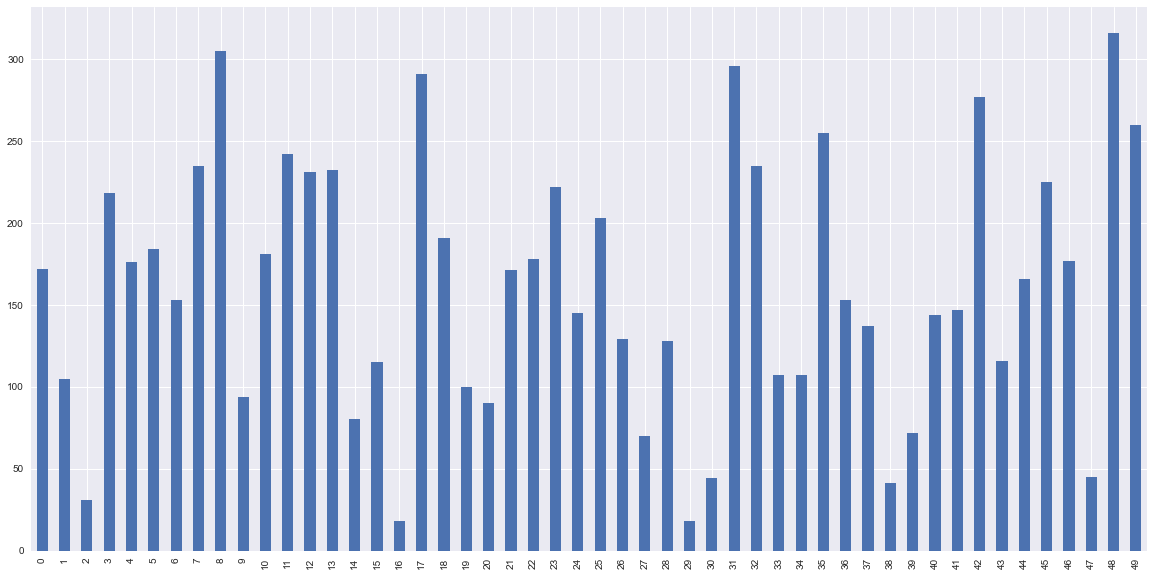

In [126]:
plt.figure(figsize=(20,10))
num_cluster.sort_index().plot(kind='bar')

In [8]:
#해당 클러스터에 속하는 선수들 전체 확인 - train

# pd.set_option('display.max_rows', None)
while True:
    find_player = int(input("살펴보고 싶은 클러스터 번호 입력 : "))
    if find_player == -1:
        break
    idx = df_train[df_train['cluster'] == find_player][:]
#     print("---------------------------------------------------------------------------------")
#     print("살펴보는 클러스터 번호 : %d" %find_player)
#     print(idx)
#     print("---------------------------------------------------------------------------------")
    print(idx.mean())
    print("---------------------------------------------------------------------------------")
    print()
    # print(f'cluster centroid : {}')

살펴보고 싶은 클러스터 번호 입력 : -1


In [127]:
from sklearn.manifold import TSNE
n_components = 3


# t-sne 모델 생성
model = TSNE(n_components=n_components)

# 학습한 결과 2차원 공간 값 출력
plot_tsne_3 = model.fit_transform(df_train.iloc[:,:-1])
# print(model.fit_transform(df_scaled_train[imp]))

In [150]:
df_tsne_3 = pd.DataFrame()
df_tsne_3['first'] = plot_tsne_3[:,0]
df_tsne_3['second'] = plot_tsne_3[:,1]
df_tsne_3['third'] = plot_tsne_3[:,2]
df_tsne_3['cluster'] = df_train['cluster']

In [129]:
# %matplotlib notebook

<ipython-input-151-45eb57ca98d0>:15: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  fig.add_axes(ax)


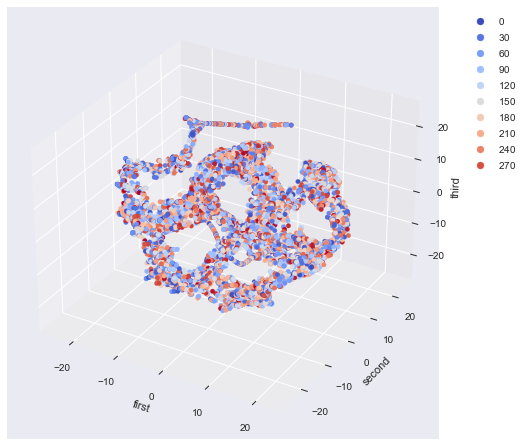

In [151]:
# %matplotlib notebook
import re, seaborn as sns
import numpy as np

from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap

# generate data

cmap = 'coolwarm'
# axes instance
fig = plt.figure(figsize=(6,6))
ax = Axes3D(fig)
fig.add_axes(ax)

# get colormap from seaborn
# cmap = ListedColormap(sns.color_palette("husl", 256).as_hex())

# plot
sc = ax.scatter(df_tsne_3['first'].astype(float), 
                df_tsne_3['second'].astype(float),df_tsne_3['third'].astype(float), c=df_tsne_3['cluster'].astype(float), marker='o', alpha=1,cmap=cmap)
# sc = ax.scatter(df_tsne['first'], df_tsne['first'], z, s=40, c=x, marker='o', cmap=cmap, alpha=1)
ax.set_xlabel('first')
ax.set_ylabel('second')
ax.set_zlabel('third')

# legend
plt.legend(*sc.legend_elements(), bbox_to_anchor=(1.05, 1), loc=2)

In [134]:
from sklearn.manifold import TSNE
n_components = 2


# t-sne 모델 생성
model = TSNE(n_components=n_components)

# 학습한 결과 2차원 공간 값 출력
plot_tsne_2 = model.fit_transform(df_train.iloc[:,:-1])
# print(model.fit_transform(df_scaled_train[imp]))

In [152]:
df_tsne_2 = pd.DataFrame()
df_tsne_2['first'] = plot_tsne_2[:,0]
df_tsne_2['second'] = plot_tsne_2[:,1]
df_tsne_2['cluster'] = df_train['cluster']

<AxesSubplot:xlabel='first', ylabel='second'>

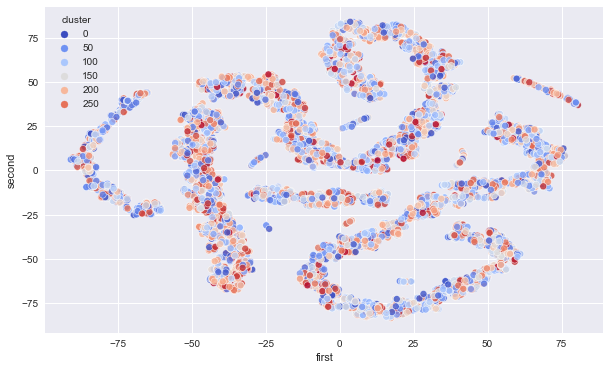

In [153]:
fig=plt.figure(figsize=(10,6))
# fig.add_subplot(111, projection='3d')
sns.scatterplot(
    x="first", y="second",
    hue="cluster",
#     palette=sns.color_palette("hls", 2),
    data=df_tsne_2,palette='coolwarm',
#     s=df_tsne_2['cluster'], c=df_tsne_2['cluster'],
#     legend="full",
    alpha=0.8
)

In [137]:
df_scaled_train['cluster'] = df_train['cluster']

In [138]:
df_scaled_train.iloc[:,:-1]

age      Mins   Tackles     Inter     Fouls  Offsides     Clear  \
0     0.707441  0.588623 -1.658322 -1.403948 -1.878565 -0.633029 -0.491676   
1     0.014360  0.260980 -0.242963  1.577682 -1.090236  2.018196  2.672478   
2    -0.216667  0.751032  0.181645  0.749452  0.289339 -0.191158 -0.418091   
3    -0.678721 -1.298150 -0.809107 -0.907009  0.289339 -0.633029 -0.565260   
4    -0.678721 -0.450797 -0.242963 -0.410071 -0.893154 -0.633029 -0.786015   
...        ...       ...       ...       ...       ...       ...       ...   
8023 -0.909747  1.243910 -0.950643 -1.238302  1.471831 -0.633029 -0.933185   
8024 -0.909747 -1.179521  1.597004  0.749452  0.880585 -0.633029 -0.418091   
8025  0.245387  0.369723 -0.526035 -1.238302 -0.498990 -0.633029 -0.565260   
8026 -0.216667 -0.243195 -0.950643 -1.238302  0.092256 -0.633029 -0.712430   
8027 -0.216667  1.808812 -0.101427 -0.575717 -0.104826 -0.633029 -0.859600   

           Drb    Blocks     Goals  ...    Fouled       Off      Disp  \
0    -1.501167 -0.908068 -0.684263  ... -1.399261 -0.627996 -1.206531   
1    -0.104770  3.165574  0.381200  ... -0.873687 -0.627996 -1.020340   
2     0.127962 -0.537737 -0.417897  ...  2.805330 -0.110755  1.213953   
3     1.524359 -0.537737 -0.684263  ...  1.053417  2.475451 -0.089385   
4     0.360695 -0.537737 -0.417897  ... -1.224069 -0.627996  0.096806   
...        ...       ...       ...  ...       ...       ...       ...   
8023 -1.035701 -0.537737  0.381200  ...  2.104565  2.475451  5.682540   
8024  1.757092 -0.537737 -0.151531  ...  0.002270 -0.627996 -0.089385   
8025 -0.104770 -0.537737  2.512127  ... -0.523304  2.475451 -0.089385   
8026 -0.802969 -0.908068  2.245761  ...  0.352652  1.958210 -0.089385   
8027  1.524359 -0.908068  1.713030  ...  4.557243 -0.627996  1.772526   

        UnsTch      AvgP       PS%   Crosses     LongB      ThrB    Rating  
0    -1.403733  0.482168 -0.522450 -0.200179  0.292857 -0.288183 -0.342049  
1    -0.639575  0.412607  0.523022 -0.200179 -0.123544 -0.288183  0.042956  
2     0.379303  0.969100  0.529639  0.101319 -0.139873 -0.288183  1.313470  
3     0.634022 -1.201223 -0.178371 -0.099680 -0.295003 -0.288183 -1.227558  
4     0.379303 -0.644730  0.384067 -0.116429 -0.254179  1.816944 -0.650052  
...        ...       ...       ...       ...       ...       ...       ...  
8023  4.836894 -1.284697 -0.317326 -0.200179 -0.327662 -0.288183 -0.534551  
8024 -0.257496  0.816064  0.384067 -0.200179 -0.237850 -0.288183 -0.226547  
8025  1.525541 -0.992538 -0.502600 -0.183429 -0.311332 -0.288183  0.427960  
8026  0.506663 -0.957758  0.556107 -0.200179 -0.327662 -0.288183  0.581962  
8027  1.907620  1.358645  0.390684  0.134819  0.023421  1.816944  2.622484  

[8028 rows x 24 columns]

In [139]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2) # 주성분을 몇개로 할지 결정
printcipalComponents = pca.fit_transform(df_scaled_train.iloc[:,:-1])

In [140]:
principalDf = pd.DataFrame(data=printcipalComponents, columns = ['principal component1', 'principal component2'])

In [155]:
principalDf['cluster'] = df_train['cluster']

<AxesSubplot:xlabel='principal component1', ylabel='principal component2'>

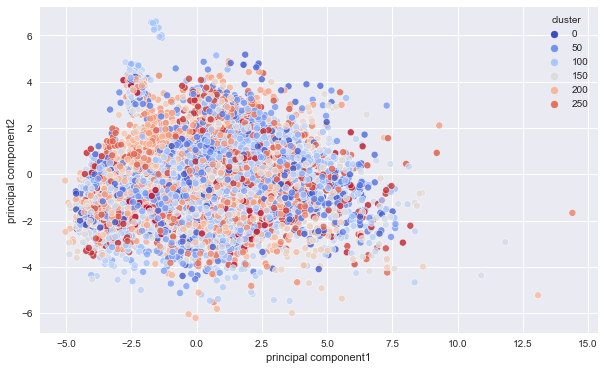

In [156]:
fig=plt.figure(figsize=(10,6))
# fig.add_subplot(111, projection='3d')
sns.scatterplot(
    x="principal component1", y="principal component2",
    hue="cluster",
#     palette=sns.color_palette("hls", 2),
    data=principalDf,
    palette='coolwarm',
#     s=df_tsne_2['cluster'], c=df_tsne_2['cluster'],
#     legend="full",
    alpha=0.8
)

In [143]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3) # 주성분을 몇개로 할지 결정
printcipalComponents = pca.fit_transform(df_scaled_train.iloc[:,:-1])
principalDf = pd.DataFrame(data=printcipalComponents, columns = ['principal component1', 'principal component2','principal component3'])
principalDf['cluster'] = df_train['cluster']

<ipython-input-157-e9c41be60484>:9: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  fig.add_axes(ax)


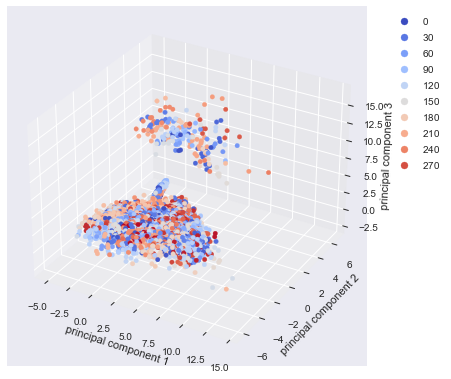

In [157]:
import re, seaborn as sns
import numpy as np

from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap
fig = plt.figure(figsize=(5,5))
ax = Axes3D(fig)
fig.add_axes(ax)
cmap = 'coolwarm'



sc = ax.scatter(principalDf['principal component1'].astype(float), 
                principalDf['principal component2'].astype(float),principalDf['principal component3'].astype(float), 
                 c=principalDf['cluster'].astype(float), marker='o', alpha=1,cmap=cmap)

ax.set_xlabel('principal component 1')
ax.set_ylabel('principal component 2')
ax.set_zlabel('principal component 3')


plt.legend(*sc.legend_elements(), bbox_to_anchor=(1.05, 1), loc=2)

In [86]:
imp

['Tackles', 'Inter', 'Blocks', 'Goals', 'Assists']

In [44]:
plt.figure(figsize=(20,6))
X = df_train.loc[:,['Tackles', 'Inter', 'Blocks', 'Goals', 'Assists','cluster']]
X

Tackles  Inter  Blocks  Goals  Assists  cluster
0         0.0    0.0     0.0      0        0        5
1         1.0    1.8     1.1      4        0       43
2         1.3    1.3     0.1      1        3        6
3         0.6    0.3     0.1      0        1       28
4         1.0    0.6     0.1      1        0       47
...       ...    ...     ...    ...      ...      ...
8023      0.5    0.1     0.1      4        2       30
8024      2.3    1.3     0.1      2        0        2
8025      0.8    0.1     0.1     12        4        4
8026      0.5    0.1     0.0     11        0       44
8027      1.1    0.5     0.0      9        9       38

[8028 rows x 6 columns]

<Figure size 1440x432 with 0 Axes>

In [56]:
centers = kmeans.cluster_centers_


In [57]:
df_scaled_train[imp].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8028 entries, 0 to 8027
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Tackles  8028 non-null   float64
 1   Inter    8028 non-null   float64
 2   Blocks   8028 non-null   float64
 3   Goals    8028 non-null   float64
 4   Assists  8028 non-null   float64
dtypes: float64(5)
memory usage: 313.7 KB


In [54]:
df_scaled_train['cluster'] = df_train['cluster']

In [47]:
df_scaled_train[imp].max(axis=0)

Tackles     5.984619
Inter       4.559312
Blocks      6.128223
Goals      10.236736
Assists     8.925600
dtype: float64

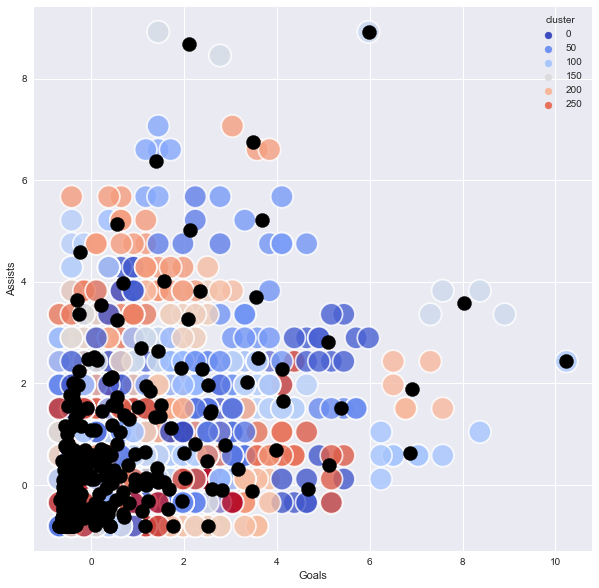

In [59]:

plt.figure(figsize=(10,10))
sns.scatterplot(x='Goals',y='Assists',data=df_scaled_train,hue='cluster',s=500,alpha=0.8,palette='coolwarm')
plt.scatter(centers[:,3],centers[:,4],c='black',s=200)

###7개 clustering 아니면 클러스터 몇개만 뽑아서 
##  왜 standard를 썻냐


<ipython-input-60-3ab12ddc4f12>:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  fig.add_axes(ax)


Text(0.5, 0, 'Z')

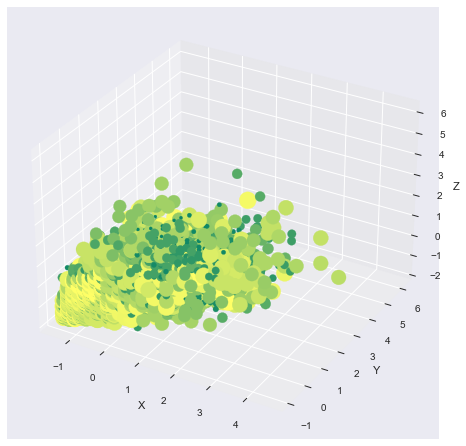

In [60]:
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap

fig = plt.figure(figsize=(6,6))
ax = Axes3D(fig)
fig.add_axes(ax)

# get colormap from seaborn
# cmap = ListedColormap(sns.color_palette("husl", 256).as_hex())

# plot
sc = ax.scatter(df_scaled_train['Inter'].astype(float), 
                df_scaled_train['Blocks'].astype(float),df_scaled_train['Tackles'].astype(float), s=df_scaled_train['cluster'].astype(float), c=df_scaled_train['cluster'].astype(float), marker='o', alpha=1,cmap='summer')
# sc = ax.scatter(df_tsne['first'], df_tsne['first'], z, s=40, c=x, marker='o', cmap=cmap, alpha=1)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
# ax.scatter(centers[:,1],centers[:,2],centers[:,0],c='black',s=300)

# plt.scatter(centers[:,3],centers[:,4],c='black',s=300)
###7개 clustering

<ipython-input-66-305853e631ad>:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  fig.add_axes(ax)


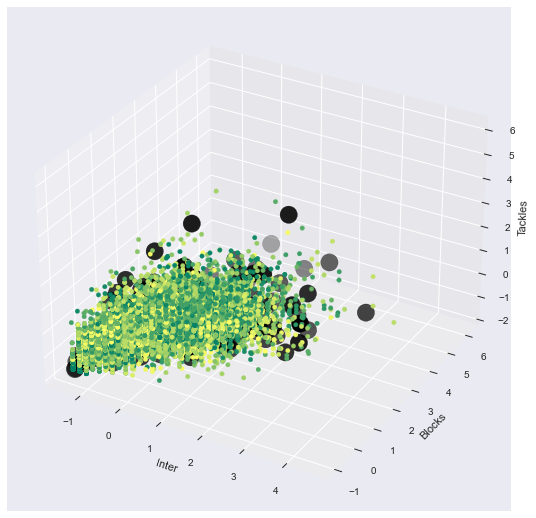

In [66]:
fig = plt.figure(figsize=(7,7))
ax = Axes3D(fig)
fig.add_axes(ax)

# get colormap from seaborn
# cmap = ListedColormap(sns.color_palette("husl", 256).as_hex())

# plot
sc = ax.scatter(df_scaled_train['Inter'].astype(float), 
                df_scaled_train['Blocks'].astype(float),df_scaled_train['Tackles'].astype(float), 
                c=df_scaled_train['cluster'].astype(float), marker='o', alpha=1,cmap='summer')
# sc = ax.scatter(df_tsne['first'], df_tsne['first'], z, s=40, c=x, marker='o', cmap=cmap, alpha=1)
ax.set_xlabel('Inter')
ax.set_ylabel('Blocks')
ax.set_zlabel('Tackles')
ax.scatter(centers[:,1],centers[:,2],centers[:,0],c='black',s=300)

# plt.scatter(centers[:,3],centers[:,4],c='black',s=300)
###7개 clustering

<ipython-input-63-bf8806492625>:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  fig.add_axes(ax)


IndexError: index 8 is out of bounds for axis 1 with size 5

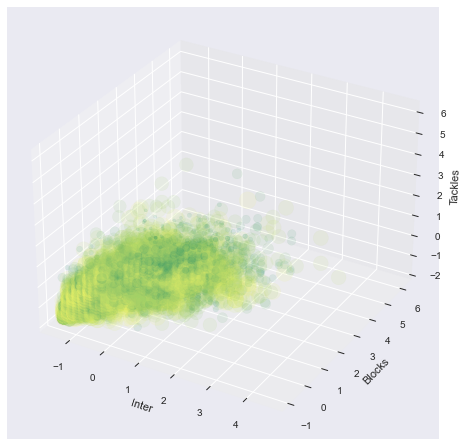

In [63]:
fig = plt.figure(figsize=(6,6))
ax = Axes3D(fig)
fig.add_axes(ax)

# get colormap from seaborn
# cmap = ListedColormap(sns.color_palette("husl", 256).as_hex())

# plot
sc = ax.scatter(df_scaled_train['Inter'].astype(float), 
                df_scaled_train['Blocks'].astype(float),df_scaled_train['Tackles'].astype(float), s=df_scaled_train['cluster'].astype(float), c=df_scaled_train['cluster'].astype(float), marker='o', alpha=0.1,cmap='summer')
# sc = ax.scatter(df_tsne['first'], df_tsne['first'], z, s=40, c=x, marker='o', cmap=cmap, alpha=1)
ax.set_xlabel('Inter')
ax.set_ylabel('Blocks')
ax.set_zlabel('Tackles')
ax.scatter(centers[:,3],centers[:,8],centers[:,2],c='black',s=300)

# plt.scatter(centers[:,3],centers[:,4],c='black',s=300)
###7개 clustering

<ipython-input-22-1ee297817418>:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  fig.add_axes(ax)


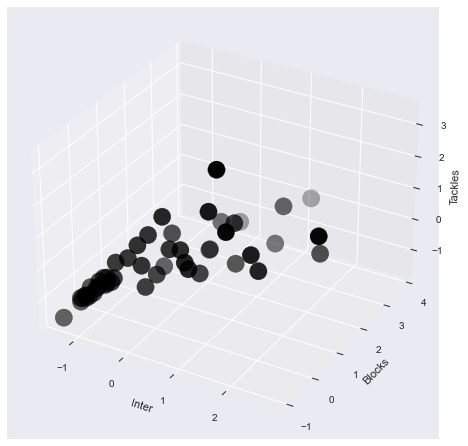

In [22]:
fig = plt.figure(figsize=(6,6))
ax = Axes3D(fig)
fig.add_axes(ax)

# get colormap from seaborn
# cmap = ListedColormap(sns.color_palette("husl", 256).as_hex())

# plot
# sc = ax.scatter(df_scaled_train['Inter'].astype(float), 
#                 df_scaled_train['Blocks'].astype(float),df_scaled_train['Tackles'].astype(float), s=df_scaled_train['cluster'].astype(float), c=df_scaled_train['cluster'].astype(float), marker='o', alpha=0.51,cmap='summer')
# sc = ax.scatter(df_tsne['first'], df_tsne['first'], z, s=40, c=x, marker='o', cmap=cmap, alpha=1)
ax.set_xlabel('Inter')
ax.set_ylabel('Blocks')
ax.set_zlabel('Tackles')
ax.scatter(centers[:,1],centers[:,2],centers[:,0],c='black',s=300)

# plt.scatter(centers[:,3],centers[:,4],c='black',s=300)
###7개 clustering

In [161]:
#모델에 대한 결과 확인 예시 코드 - train and test / 모델 = 42 / train-test = 13
from sklearn.cluster import KMeans

#----------------------------------------------------------------------
#{간단한 모델 / 복잡한 모델} => 중요 피쳐만 써서 시각화 
#중요한 피쳐만 뽑은 모델 / 다넣은 모델이랑 결과를 비교해보자

#피쳐 개수 => 5개 / 30개 { 골 , 어시스트 , 블락 , 인터셉트 , 태클 }
#K = 50 / 100 / 150 / 200 / 250 / 300
#Mins = 900

#위 파라미터에 대해서 시나리오에 각각 적용하고 의미있는 결과 보이기
#----------------------------------------------------------------------

k = 300 #k_means 파라미터 k 개수 -> 50 ~ 300

kmeans = KMeans(n_clusters=k, random_state=42) 
kmeans.fit(df_scaled_train)

df_test_result = kmeans.predict(df_scaled_test)

result_by_sklearn = df_scaled_train.copy()
result_by_sklearn["cluster"] = kmeans.labels_

test_result = df_scaled_test.copy()
test_result["cluster"] = df_test_result

result_by_sklearn.head()

result_by_sklearn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6772 entries, 0 to 6771
Data columns (total 27 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       6772 non-null   float64
 1   Mins      6772 non-null   float64
 2   Assists   6772 non-null   float64
 3   Rating    6772 non-null   float64
 4   Tackles   6772 non-null   float64
 5   Inter     6772 non-null   float64
 6   Fouls     6772 non-null   float64
 7   Offsides  6772 non-null   float64
 8   Clear     6772 non-null   float64
 9   Drb       6772 non-null   float64
 10  Blocks    6772 non-null   float64
 11  OwnG      6772 non-null   float64
 12  Goals     6772 non-null   float64
 13  SpG       6772 non-null   float64
 14  KeyP      6772 non-null   float64
 15  Drb.1     6772 non-null   float64
 16  Fouled    6772 non-null   float64
 17  Off       6772 non-null   float64
 18  Disp      6772 non-null   float64
 19  UnsTch    6772 non-null   float64
 20  KeyP.1    6772 non-null   floa

In [86]:
test_result

age      Mins   Assists    Rating   Tackles     Inter     Fouls  \
0    -0.692294 -0.748543 -0.390623  0.001047  0.090553  0.141378 -0.102450   
1    -0.923604  1.910139 -0.917048 -0.175968 -1.664543 -1.382802 -1.878883   
2     0.232950 -0.111016  0.267409  0.107255 -0.640737 -0.874742 -0.497213   
3    -1.386226 -0.947596 -0.324819  0.231166  0.675585 -0.027976 -0.497213   
4     0.232950 -0.159735  0.793835  0.054151 -0.201963 -1.044095  0.489695   
...        ...       ...       ...       ...       ...       ...       ...   
2253 -1.617537  1.477234  0.004196  0.301972 -0.055705  0.649437  0.489695   
2254  1.852126 -0.479890 -0.917048  0.452434 -0.055705 -0.027976 -0.299831   
2255  0.232950  1.184918 -0.324819 -5.327097  0.090553 -0.027976 -0.299831   
2256 -0.229672 -0.257174 -0.259016 -5.592619  0.090553  0.818791 -0.497213   
2257 -0.692294 -1.221816 -0.917048  0.001047 -1.664543 -1.382802 -1.878883   

      Offsides     Clear       Drb  ...       Off      Disp    UnsTch  \
0    -0.178554 -0.162851 -0.558814  ... -0.156051 -0.734836 -0.780658   
1    -0.624543 -0.754870 -1.502393  ... -0.993816 -0.734836 -1.078014   
2    -0.624543 -0.680868 -0.794708  ...  0.849266 -0.047392 -0.185946   
3    -0.624543 -0.680868 -0.087024  ...  0.011502 -0.276540 -0.483302   
4    -0.624543 -0.754870 -0.794708  ...  0.849266  0.410903  0.854800   
...        ...       ...       ...  ...       ...       ...       ...   
2253 -0.624543 -0.236854  1.092450  ...  1.854584 -0.734836  0.111410   
2254  0.267435  3.241259 -0.794708  ... -0.993816 -0.505688 -0.929336   
2255  0.267435 -0.014846 -0.322919  ...  0.179055 -0.505688 -1.078014   
2256 -0.178554  0.281163  0.148871  ...  0.346607 -0.734836 -0.780658   
2257 -0.624543 -0.458861 -1.502393  ... -0.993816 -0.734836 -1.078014   

        KeyP.1      AvgP       PS%   Crosses     LongB      ThrB  cluster  
0    -0.163775 -0.704901  0.041714  0.158551 -0.792019 -0.237557      237  
1    -0.165759 -0.510372 -0.600871 -0.729807  2.272854 -0.237557       71  
2    -0.164058 -1.120791  0.185845 -0.285628 -0.895913 -0.237557       37  
3    -0.160941  0.489107  0.564189  1.268998  0.558603 -0.237557       35  
4    -0.164058 -0.456708  0.143807 -0.729807 -0.272549 -0.237557      137  
...        ...       ...       ...       ...       ...       ...      ...  
2253 -0.160374  0.549478  0.161823  3.711982  0.506656  0.330667      234  
2254 -0.165192  0.764131  0.906500 -0.507717  0.143027 -0.237557       23  
2255  3.524137 -1.932449 -4.348278  1.268998 -0.792019  8.854027       11  
2256  9.271531 -2.066607 -4.348278 -0.729807 -1.103701 -0.237557       38  
2257 -0.165475 -0.013986 -2.066203 -0.729807  2.376748 -0.237557       10  

[2258 rows x 27 columns]

In [87]:
result_by_sklearn.head()

age      Mins   Assists    Rating   Tackles     Inter     Fouls  \
0  0.729623 -0.589796 -0.243766 -0.163864 -0.949643 -0.917416  0.903308   
1 -1.630993  2.091623 -0.243766  0.409228  0.325249  0.592629 -0.290370   
2  0.021438  1.046417 -0.243766  0.306585  1.175178  0.257064  0.306469   
3 -1.158870 -0.872987 -0.830516 -0.035560 -0.807988 -0.414067 -1.086156   
4  0.021438  0.284401  0.147400  0.315138  1.316832  0.760412  0.903308   

   Offsides     Clear       Drb  ...       Off      Disp    UnsTch    KeyP.1  \
0 -0.631301 -0.714191 -1.047128  ... -0.338780  0.210926  0.906060 -0.177619   
1  0.713233  1.975202 -1.047128  ... -0.826945 -0.254955 -0.771274 -0.177619   
2  0.265055 -0.116548  1.712074  ...  0.149386 -0.487896  0.601090 -0.175128   
3 -0.631301  0.182274 -1.506995  ... -0.501502 -0.720836 -0.923759 -0.177619   
4 -0.631301 -0.415369  4.471276  ...  0.962995 -0.720836  0.143636 -0.174852   

       AvgP       PS%   Crosses     LongB     ThrB  cluster  
0 -1.486450 -0.037027 -0.725657 -1.058003 -0.25335      187  
1  0.962068  0.407964 -0.725657  0.853213 -0.25335      177  
2  0.599821  0.581337  1.870188 -0.705937 -0.25335       51  
3  1.170024  0.887630 -0.725657  0.752623 -0.25335       69  
4  1.773768  0.835618  0.355945  0.802918 -0.25335      193  

[5 rows x 27 columns]

In [92]:
df_sub.reset_index(drop=True , inplace=True)
df_sub_test.reset_index(drop=True , inplace=True)
df_sub.info()
df_sub

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6772 entries, 0 to 6771
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   season  6772 non-null   object
 1   league  6772 non-null   object
 2   name    6772 non-null   object
 3   Apps    6772 non-null   object
dtypes: object(4)
memory usage: 211.8+ KB


season           league  \
0     2020-2021         SuperLig   
1     2020-2021        LeagueOne   
2     2019-2020           Brazil   
3     2020-2021        Eredivsie   
4     2019-2020          England   
5     2020-2021        LeagueOne   
6     2019-2020          LigaNOS   
7     2020-2021        LeagueOne   
8     2019-2020       Bundesliga   
9     2019-2020      Bundesliga2   
10    2020-2021     Championship   
11    2019-2020          SericeA   
12    2020-2021           LaLiga   
13    2019-2020           LaLiga   
14    2020-2277           Ligue1   
15    2020-2021       Bundesliga   
16    2019-2020      Bundesliga2   
17    2019-2020          SericeA   
18    2020-2021        Eredivsie   
19    2019-2020           Russia   
20    2020-2021     Championship   
21    2020-2021        LeagueTwo   
22    2020-2021           LaLiga   
23    2019-2020          England   
24    2019-2020  LigaProfesional   
25    2019-2020  LigaProfesional   
26    2019-2020        Eredivsie   
27    2020-2074           Ligue1   
28    2020-2021     Championship   
29    2019-2020     Championship   
30    2019-2020         SuperLig   
31    2019-2020          England   
32    2019-2020          LigaNOS   
33    2020-2021           LaLiga   
34    2019-2020           Ligue1   
35    2019-2020        LeagueTwo   
36    2019-2020       Bundesliga   
37    2019-2020       Bundesliga   
38    2019-2020      Bundesliga2   
39    2020-2021     Championship   
40    2019-2020         SuperLig   
41    2019-2020          England   
42    2020-2021        Eredivsie   
43    2020-2021        LeagueTwo   
44    2019-2020           Brazil   
45    2020-2021           LaLiga   
46    2019-2020       Bundesliga   
47    2019-2020          LigaNOS   
48    2020-2021      Bundesliga2   
49    2020-2021      Bundesliga2   
50    2020-2021        Eredivsie   
51    2019-2020           Ligue1   
52    2019-2020           Brazil   
53    2019-2020          SericeA   
54    2019-2020           LaLiga   
55    2019-2020           Brazil   
56    2020-2021           LaLiga   
57    2020-2021        Eredivsie   
58    2019-2020         SuperLig   
59    2019-2020          England   
60    2019-2020      Bundesliga2   
61    2020-2021        LeagueTwo   
62    2019-2020         SuperLig   
63    2020-2021           LaLiga   
64    2020-2021         SuperLig   
65    2019-2020       Bundesliga   
66    2020-2021        Eredivsie   
67    2019-2020       Bundesliga   
68    2020-2021         SuperLig   
69    2019-2020     Championship   
70    2019-2020           Russia   
71    2019-2020  LigaProfesional   
72    2019-2020  LigaProfesional   
73    2020-2021           LaLiga   
74    2019-2020     Championship   
75    2019-2020           Brazil   
76    2020-2021         SuperLig   
77    2020-2021          SericeA   
78    2019-2020           Ligue1   
79    2019-2020         SuperLig   
80    2020-2021           Russia   
81    2019-2020          LigaNOS   
82    2020-2021     Championship   
83    2019-2020         SuperLig   
84    2020-2021      Bundesliga2   
85    2019-2020           LaLiga   
86    2020-2021        LeagueTwo   
87    2019-2020        LeagueOne   
88    2020-2021        LeagueTwo   
89    2019-2020     Championship   
90    2020-2278           Ligue1   
91    2019-2020           Brazil   
92    2019-2020  LigaProfesional   
93    2020-2021          SericeA   
94    2019-2020     Championship   
95    2019-2020  LigaProfesional   
96    2020-2021          England   
97    2020-2021           Brazil   
98    2020-2021      Premiership   
99    2020-2021           Brazil   
100   2019-2020     Championship   
101   2020-2021          SericeA   
102   2020-2021        LeagueTwo   
103   2020-2021        LeagueTwo   
104   2020-2021        LeagueTwo   
105   2020-2021           Brazil   
106   2019-2020              USA   
107   2019-2020        LeagueOne   
108   2019-2020         SuperLig   
109   2020-2021      Premiership   
110   2020-20

In [102]:
#----------------------------------------------------------------------
#To-do
#1. 이 클러스터는 어떤선수들이 모였나
#2. 클러스터에 있는 선수들 feature 값 출력해보기
#시나리오 1. 특출난 선수급의 활약을 보여주는 유명하지 않은 선수
#시나리오 2. 팀의 주전급 선수가 이탈하게 되어 대신할 선수 찾기

#To-do option
#{간단한 모델 / 복잡한 모델} => 중요 피쳐만 써서 시각화 
#중요한 피쳐만 뽑은 모델 / 다넣은 모델이랑 결과를 비교해보자

#피쳐 개수 => 5개 / 30개 { 골 , 어시스트 , 블락 , 인터셉트 , 태클 }
#K = 50 / 100 / 150 / 200 / 250 / 300
#Mins = 900

#위 파라미터에 대해서 시나리오에 각각 적용하고 의미있는 결과 보이기

#-----------------------------------------------------------------------

#google 검색 : soccer scout process -> 축구 스카우팅 과정들이 나와있음 나중에 보고서 쓸 때 활용해도 될듯

#실제 스카우팅 과정에서 사용 = 각 축구 클럽은 해당 클럽에 속한 나라에 스카우팅 본사를 둔다
#이후 각 나라에 스카우터들을 파견하고 현지 스카우터는 그 나라에 머무르면서 스카우팅을 지속적으로 진행한다.
#모든 나라에 스카우터들을 보낼 수 없으므로 이 과정속에서 놓치는 나라와 그 나라의 선수들이 존재한다.
#이 부분에서 그 나라의 선수들의 데이터를 수집할 수 있다면 이러한 모델이 시나리오상 도움이 될 수 있다.
#현지 스카우터를 파견하지 않고서도 현지 스카우터를 파견한 것과 같은 효과를 낼 수 있을 수 있다.
#----------------------------------------------------------------------

In [164]:
#해당 클러스터에 속하는 선수들 전체 확인 - train

df_c = result_by_sklearn[['cluster']]
df_c.reset_index(drop=True , inplace=True)

df_cluster = pd.concat([df_sub, df_c], axis = 1)
#df_cluster

find_player = input("살펴보고 싶은 비슷한 선수들의 기준 선수 이름 입력 : ")
idx = df_cluster.index[df_cluster['name'] == find_player]
cluster_idx = []
for i in idx:
    cluster_idx.append(int(df_cluster.loc[i,["cluster"]].values))
print(cluster_idx)

#예시 : Lionel Messi Barcelona (복사해서 확인) / Nuno Tavares Benfica

#판다스 열 전체 보기 None 대신 10으로 두기
pd.set_option('display.max_rows', None)


p = 0

for i in cluster_idx:
    print("---------------------------------------------------------------------------------")
    print("기준 선수")
    print("")
    print(df_cluster.loc[idx[p],:])
    print("---------------------------------------------------------------------------------")
    print(df_cluster.loc[(df_cluster['cluster'] == i)])
    print("---------------------------------------------------------------------------------")
    p += 1


살펴보고 싶은 비슷한 선수들의 기준 선수 이름 입력 : 
[]


In [165]:
#해당 클러스터에 속하는 선수들 전체 확인 - train

pd.set_option('display.max_rows', None)

find_player = int(input("살펴보고 싶은 클러스터 번호 입력 : "))
idx = df_cluster[df_cluster['cluster'] == find_player]
print("---------------------------------------------------------------------------------")
print("살펴보는 클러스터 번호 : %d" %find_player)
print(idx)
print("---------------------------------------------------------------------------------")
    

살펴보고 싶은 클러스터 번호 입력 : 94
---------------------------------------------------------------------------------
살펴보는 클러스터 번호 : 94
         season        league                              name   Apps  \
548   2020-2021     LeagueOne           Dan Butler Peterborough  40(2)   
944   2020-2021   Premiership  Scott McMann Hamilton Academical     31   
1391  2019-2020  Championship               Matt Grimes Swansea     48   
1604  2020-2021  Championship              Joe Jacobson Wycombe  36(1)   
2027  2020-2021      SuperLig      Karim Hafez Yeni Malatyaspor  31(2)   
2183  2019-2020  Championship                 Tommy Smith Stoke  27(3)   
2202  2020-2021     LeagueTwo           Chris Hussey Cheltenham     43   
2487  2020-2021  Championship               Ryan Ledson Preston  31(5)   
2826  2020-2021  Championship            Barry Bannan Sheff Wed     46   
2865  2019-2020      SuperLig   Gaël Clichy Istanbul Basaksehir  30(1)   
3250  2020-2021        LaLiga               Jesús Navas Sevill

In [162]:
#해당 클러스터에 속하는 선수들 전체 확인 - test

pd.set_option('display.max_rows', None)
    
df_c_test = test_result[['cluster']]
df_c_test.reset_index(drop=True , inplace=True)

df_cluster_test = pd.concat([df_sub_test, df_c_test], axis = 1)
#df_cluster

find_player = int(input("살펴보고 싶은 클러스터 번호 입력 : "))
idx = df_cluster_test[df_cluster_test['cluster'] == find_player]
print("---------------------------------------------------------------------------------")
print("살펴보는 클러스터 번호 : %d" %find_player)
print(idx)
print("---------------------------------------------------------------------------------")
    

살펴보고 싶은 클러스터 번호 입력 : 1
---------------------------------------------------------------------------------
살펴보는 클러스터 번호 : 1
         season        league                              name    Apps  \
163   2020-2021        LaLiga             Ángel Montoro Granada   18(5)   
207   2019-2020     LeagueTwo         Christie Elliott Carlisle   13(3)   
376   2020-2021      SuperLig        Ismail Aissati Denizlispor   11(2)   
400   2019-2020        LaLiga  Víctor Camarasa Deportivo Alaves   15(2)   
533   2020-2021        LaLiga       Daniel Carvajal Real Madrid   11(2)   
594   2020-2021  Championship                   Joe Allen Stoke   15(3)   
780   2020-2021  Championship                Lukas Rupp Norwich   15(8)   
879   2020-2021  Championship            Lewis Holtby Blackburn   20(7)   
1251  2019-2020  Championship              Kieran Lee Sheff Wed   20(8)   
1566  2019-2020        LaLiga               Fran Mérida Osasuna  12(11)   
1924  2019-2020        LaLiga            Ivan Rakitic

# 이너셔 스코어   feature 24개

In [34]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(df_scaled_train)
                for k in range(50, 301, 50)]
inertias = [model.inertia_ for model in kmeans_per_k]

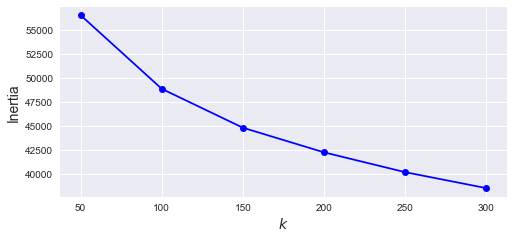

In [35]:
plt.figure(figsize=(8, 3.5))
plt.plot(range(50, 301, 50), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.xticks(range(50, 301, 50))
plt.show()

In [36]:
from sklearn.metrics import silhouette_score
silhouette_scores = [silhouette_score(df_scaled_train, model.labels_)
                     for model in kmeans_per_k[:]]


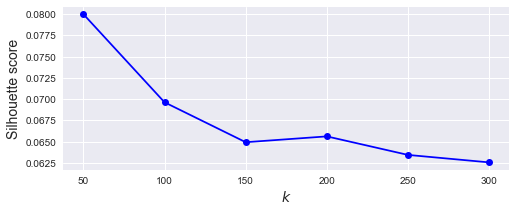

In [37]:
plt.figure(figsize=(8, 3))
plt.plot(range(50, 301, 50), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
# plt.axis([1.8, 8.5, 0.55, 0.7])
# save_fig("silhouette_score_vs_k_plot")
plt.xticks(range(50, 301, 50))
plt.show()

In [21]:
silhouette_scores

[0.06962667923890621,
 0.06492651679401626,
 0.0656119574108314,
 0.06342969945182259,
 0.0625501988220571]

In [27]:
df_scaled_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8028 entries, 0 to 8027
Data columns (total 24 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       8028 non-null   float64
 1   Mins      8028 non-null   float64
 2   Tackles   8028 non-null   float64
 3   Inter     8028 non-null   float64
 4   Fouls     8028 non-null   float64
 5   Offsides  8028 non-null   float64
 6   Clear     8028 non-null   float64
 7   Drb       8028 non-null   float64
 8   Blocks    8028 non-null   float64
 9   Goals     8028 non-null   float64
 10  Assists   8028 non-null   float64
 11  SpG       8028 non-null   float64
 12  KeyP      8028 non-null   float64
 13  Drb.1     8028 non-null   float64
 14  Fouled    8028 non-null   float64
 15  Off       8028 non-null   float64
 16  Disp      8028 non-null   float64
 17  UnsTch    8028 non-null   float64
 18  AvgP      8028 non-null   float64
 19  PS%       8028 non-null   float64
 20  Crosses   8028 non-null   floa

# 이너셔 스코어 feature 5개

In [28]:
imp

['Tackles', 'Inter', 'Blocks', 'Goals', 'Assists']

In [29]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(df_scaled_train[imp])
                for k in range(50, 301, 50)]
inertias = [model.inertia_ for model in kmeans_per_k]

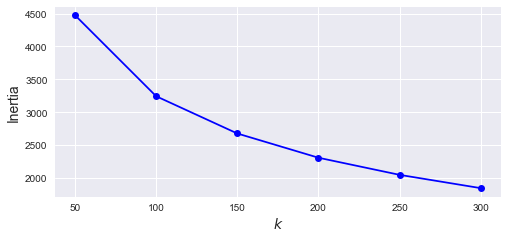

In [30]:
plt.figure(figsize=(8, 3.5))
plt.plot(range(50, 301, 50), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.xticks(range(50, 301, 50))
plt.show()

In [31]:
from sklearn.metrics import silhouette_score
silhouette_scores = [silhouette_score(df_scaled_train[imp], model.labels_)
                     for model in kmeans_per_k[:]]


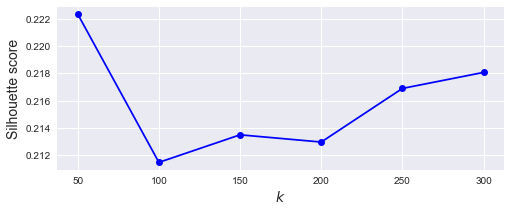

In [32]:
plt.figure(figsize=(8, 3))
plt.plot(range(50, 301, 50), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
# plt.axis([1.8, 8.5, 0.55, 0.7])
# save_fig("silhouette_score_vs_k_plot")
plt.xticks(range(50, 301, 50))
plt.show()